In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Dataset
df = pd.read_csv("cleaned_acf.csv")

In [3]:
df.head()

,Date,Flight #,Registration,Fatalities,Fatalities Passangers,Fatalities Crew,Year,Month,Day,"Location_\tPreobrazhenka, Ukraine",...,AC Type_de Havilland DH-114 Heron,AC Type_de Havilland DH-114 Heron 2,AC Type_de Havilland DH-114 Heron 2B,AC Type_de Havilland DH106 Comet 1,AC Type_de Havilland DHC -6-100,AC Type_de Havilland DHC-6 Twin Otter,AC Type_de Havilland DHC-6 Twin Otter 300,AC Type_de Havilland DHC-6 Twin Otter 400,AC Type_de Havilland DHC-6-200,AC Type_de Havilland Dash-2 Beaver
0,1928-01-16,F-AIKG,F-AIKG,2.0,0.0,2.0,1928,1,16,False,...,False,False,False,False,False,False,False,False,False,False
1,1930-01-19,7,NC9689,16.0,14.0,2.0,1930,1,19,False,...,False,False,False,False,False,False,False,False,False,False
2,1931-03-31,599,NC-999,8.0,6.0,2.0,1931,3,31,False,...,False,False,False,False,False,False,False,False,False,False
3,1934-08-31,6,NC11118,5.0,4.0,1.0,1934,8,31,False,...,False,False,False,False,False,False,False,False,False,False
4,1935-05-06,6,NC13785,5.0,3.0,2.0,1935,5,6,False,...,False,False,False,False,False,False,False,False,False,False


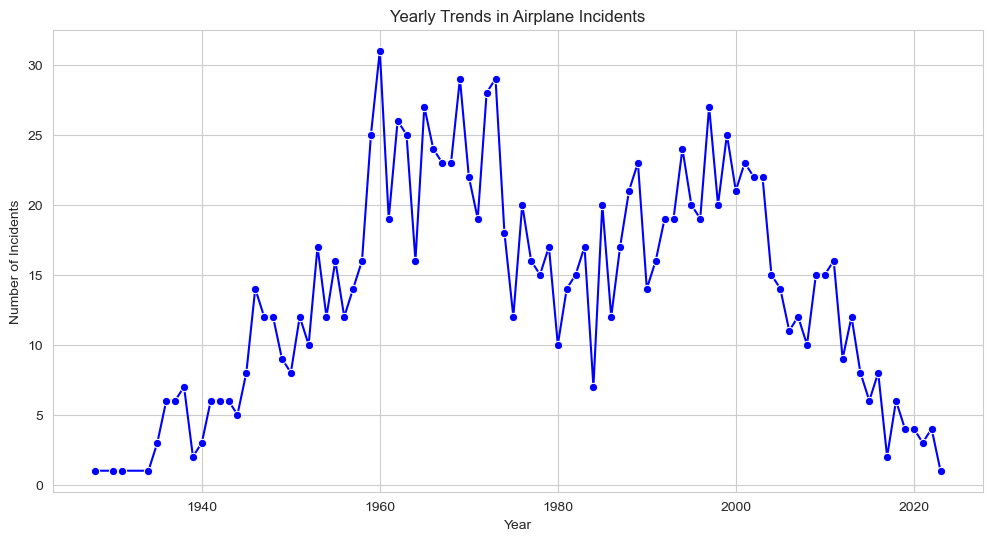

In [5]:
# Yearly Trends Analysis
yearly_trends = df.groupby('Year').size()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_trends.index, y=yearly_trends.values, marker='o', color='blue')
plt.title('Yearly Trends in Airplane Incidents')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

## Spikes and Dips

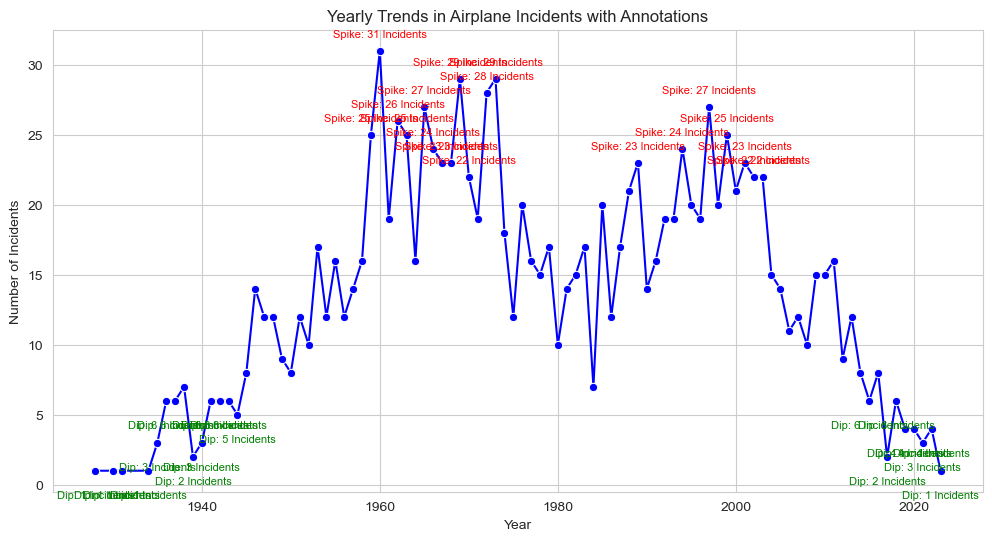

In [7]:
# Yearly Trends Analysis with Annotations for Spikes and Dips
yearly_trends = df.groupby('Year').size()

# Identify notable spikes and dips
notable_spikes = yearly_trends[yearly_trends > yearly_trends.mean() + yearly_trends.std()]
notable_dips = yearly_trends[yearly_trends < yearly_trends.mean() - yearly_trends.std()]

# Plotting with Annotations
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_trends.index, y=yearly_trends.values, marker='o', color='blue')
plt.title('Yearly Trends in Airplane Incidents with Annotations')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)

# Annotate notable spikes
for year, incidents in notable_spikes.items():
    plt.annotate(f'Spike: {incidents} Incidents', (year, incidents), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='red')

# Annotate notable dips
for year, incidents in notable_dips.items():
    plt.annotate(f'Dip: {incidents} Incidents', (year, incidents), textcoords="offset points", xytext=(0, -20), ha='center', fontsize=8, color='green')

plt.show()